In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Technical Supplement

In this notebook we cover some common machine learning concepts. 

# Cross Entropy

Also called the "log loss" function, this is an objective loss function that is used for classification.  For $N$ samples and $M$ classes the cross entropy is,  

$$
\mathcal{E}(Y_t, Y_p) = -\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{M}
Y_t^{i,j} \log(Y_p^{i,j}) 
$$

The variable $Y_p^{i,j}$ is the model prediction (a probability) that sample $i$ is class $j$.  The variable $Y_t^{i,j}$ is a binary variable that takes on the value 1 if the true class of sample $i$ is class $j$ and 0 otherwise.  This function takes two vectors and returns a scalar value. 

# Binary Cross Entropy

In the special case of binary classification (i.e. a problem where the target variable can only take on values of 0 or 1) the general cross entropy formula yields, 

$$
\mathcal{E}(Y_t, Y_p) = -\frac{1}{N} \sum_{i=1}^{N} 
\left[ 
Y_t^{i,1} \log(Y_p^{i,1}) + 
Y_t^{i,2} \log(Y_p^{i,2})
\right]
$$

If we take advantage of the fact that $Y_t^{i,2} = 1 - Y_t^{i,1}$ and $Y_p^{i,2} = 1 - Y_p^{i,1}$ we can write 

$$
\mathcal{E}(Y_t, Y_p) = -\frac{1}{N} \sum_{i=1}^{N} 
\left[ 
Y_t^{i,1} \log(Y_p^{i,1}) + 
(1-Y_t^{i,1}) \log(1-Y_p^{i,1})
\right]
$$

and at this point the $j=1$ label is superfluous and we can simply write, 

$$
\mathcal{E}(Y_t, Y_p) = -\frac{1}{N} \sum_{i=1}^{N} 
\left[ 
Y_t^{i} \log(Y_p^{i}) + 
(1-Y_t^{i}) \log(1-Y_p^{i})
\right]
$$

In [3]:
def binary_crossentropy(Yt, Yp):
    epsilon = 1e-15
    Yp = np.maximum(epsilon, Yp)
    Yp = np.minimum(1-epsilon, Yp)
    ll = sum(Yt * np.log(Yp) + np.subtract(1,Yt) * np.log(np.subtract(1,Yp)))
    ll = ll * -1.0 / len(Yt)
    return ll

We can look at the contribution of a single sample to the binary cross entropy as a function of the difference between the prediction and the actual true class value. 

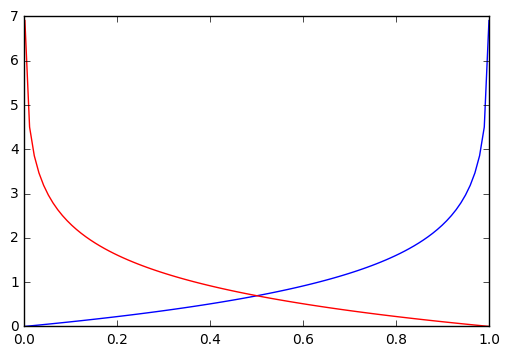

In [4]:
Yps = np.linspace(0.001, 0.999, 100)
Yt = 0
bce_0 = []
for Yp in Yps:
    bce_0.append(binary_crossentropy([Yt], [Yp]))
Yt = 1
bce_1 = []
for Yp in Yps:
    bce_1.append(binary_crossentropy([Yt], [Yp]))

plt.plot(Yps, bce_0, color='blue')    
plt.plot(Yps, bce_1, color='red')

# Linear Separability

Some notes on the concept of linear separability and its application to machine learning. 

## Formal Definition

Technically, two sets of points ($P_0$ and $P_1$) are linearly separable if a single hyperplane can divide the space they live in such that all points in $P_0$ are on one side of the hyperplane and all points in $P_1$ are on the other side of the hyperplane.  A hyperplane divides space into two half-spaces and is defined in $n$-dimensions by all the points that satisfy the following equation, 

$$
g(\vec{x}) = \sum_{i=1}^{n} a_i x_i = \vec{a} \cdot \vec{x} = b 
$$

where the $n+1$ constants $a_1$, $a_2$, ..., $a_n$ and $b$ determine the orientation and position of the hyperplane and $x_1$, $x_2$, ..., $x_n$ are the coordinates of a point.  The vector $\vec{a}$ is normal to the hyperplane.  Points for which $g(\vec{x}) - b > 0$ are in the half-space the normal vector extends into and points for which $g(\vec{x}) -b < 0$ are in the other half-space.  If $g(\vec{x}) - b = 0$ then the point $\vec{x}$ is on the hyperplane. 

A hyperplane is simply a fancy name for a geometric object that divides an n-dimensional space in two.  If we are working with 1-dimensional data, a hyperplane is a point (dividing a line in two).  If we are working with two dimensional data, a hyperplane is a line (dividing a plane in two).  If we are working with three dimensional data, a hyperplane is ... well ... a plane.  This concept can be extended to an arbitrary number of dimensions and the hyperplane always has one less dimension than the space that it is dividing.  

Below we demonstrate the concept in 2-D. 

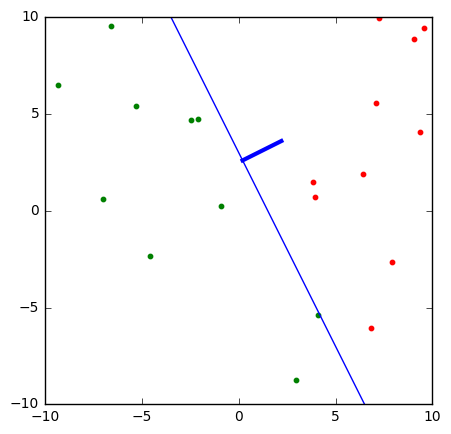

In [17]:
# create figure
fig = plt.figure(figsize=(5,5))

# set parameters of hyperplane
a1 = 2.0
a2 = 1.0
b = 3.0

# generate points on hyperplane
# a1 x1 + a2 x2 = b
# x2 = (b - a1 x1) / a2
npts = 100
x1 = np.linspace(-20, 20, npts)
x2 = (b - a1 * x1) / a2
plt.plot(x1, x2, color='blue', lw=1.0)
plt.xlim(-10,10)
plt.ylim(-10,10)

# plot normal to hyperplane
n = (a1,a2)  # normal vector 
p = (x1[npts//2], x2[npts//2])  # choose some point on the hyperplane
# draw a vector starting on the hyperplane and extending
# in the direction of the normal vector 
plt.plot([p[0], p[0] + n[0]], [p[1], p[1] + n[1]], color='blue', lw=3.0)

# generate some random points
xrn = np.random.uniform(low=-10, high=10, size=20)
yrn = np.random.uniform(low=-10, high=10, size=20)
# determine which side of the hyperplane each point is on
g = a1 * xrn + a2 * yrn - b
for i in range(20):
    # note that for g > 0 the points are on the side the normal vector points 
    if g[i] > 0: 
        color = 'red' 
    # for g < 0, we're on the other side of the hyperplane
    else:
        color='green'
    plt.scatter([xrn[i]], [yrn[i]], s=10, color=color)